# Car Lease Calculator

Park Street Ventures LLC

Subu Sangameswar

May 2020

In [11]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import matplotlib
import numpy_financial as npf
%matplotlib inline
matplotlib.style.use('ggplot')

In [12]:
# input data

# This is the Manufacturer's Suggested Retail Price, also called the sticker price of the car
msrp = 32055

# This is the negotiated price of the car, which is usually less than the MSRP or sticker price
base_cap_cost = 28095

# Acquisition fees usually range from $250 to $750.  This fee is included in every lease agreement.
dealer_acquisition_cost = 995

# Additional costs associated with any other features outside of the lease, such as an extended warranty.
extended_warranties = 2500

In [29]:
# Cost reductions 

# Includes cash or other allowances that pay down the capitalized cost of the car
down_payment = 2000

# Any trade in allowance the dealer might offer you for an existing vehicle.
trade_in_allowance = 1000

# Lease terms

# Should be between .50 and .59 ..higher better
residual_percentage = 0.59

apr = 3 # Effective APR on the lease in %

term_of_lease = 48 # The term must be 24, 36 or 48 months

sales_tax = 6 # State sales tax due on the lease in %

In [27]:
# using lease term and residual percentage to generate the money factor
def get_factor(term_of_lease, residual_percentage=0):
    factor = 0
    if residual_percentage == 0:
        if term_of_lease == 24: factor = .6
        elif term_of_lease == 36: factor = .5
        elif term_of_lease == 48: factor = .45
        else: factor = .6
    else:
        factor = residual_percentage
    return factor

# calculate the total lease payments and monthly payment
def get_payment(base_cap_cost, apr, residual_percentage, term_of_lease=48, dealer_acquisition_cost=995, extended_warranties=0, down_payment=0, trade_in_allowance=0):
    
    gross_capitalized_cost = base_cap_cost + dealer_acquisition_cost + extended_warranties
    net_capitalized_cost = gross_capitalized_cost - down_payment - trade_in_allowance

    money_factor = apr/(24*100)
    factor = get_factor(term_of_lease, residual_percentage)
    residual_value = factor * msrp

    # calculation of lease cost

    # Total depreciation on the car, which is the net capitalized cost minus the residual value.
    depreciation = net_capitalized_cost - residual_value
    # The rent charged on the money borrowed over the term of the lease.
    finance_charge = (net_capitalized_cost + residual_value) * money_factor * term_of_lease
    # State sales tax due on the lease
    lease_sales_tax = (depreciation + finance_charge) * sales_tax/100
    # (depreciation,finance_charge,sales_tax )
    total_payments = depreciation + finance_charge + lease_sales_tax
    
    # total_lease_payments
    total_lease_payment = gross_capitalized_cost - total_payments - extended_warranties  #Total costs associated with the lease itself.
    sales_tax_due = (down_payment - trade_in_allowance)*sales_tax/100

    monthly_lease = (depreciation + finance_charge)/term_of_lease
    monthly_sales_tax = lease_sales_tax/term_of_lease
    total_monthly_payment = monthly_lease + monthly_sales_tax

    return total_lease_payment, total_monthly_payment

In [30]:
get_payment(base_cap_cost, apr, residual_percentage, term_of_lease, dealer_acquisition_cost, extended_warranties, down_payment, trade_in_allowance)

(15810.641179999999, 276.65330875)

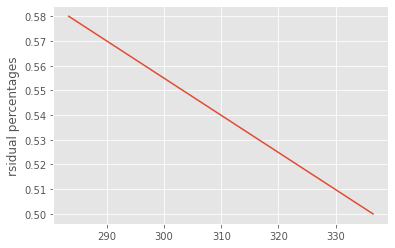

In [35]:
# let us compare monthly payments for different money factor for same lease terms
monthly_payment =[]
residual_percentage = [.5,.52,.54,.56,.58]

for x in residual_percentage:
    total_payment_1, monthly_payment_1 = get_payment(base_cap_cost, apr, x, term_of_lease, dealer_acquisition_cost, extended_warranties, down_payment, trade_in_allowance)
    monthly_payment.append(monthly_payment_1)

plt.plot(monthly_payment, residual_percentage)
plt.ylabel('residual percentages')
plt.show()

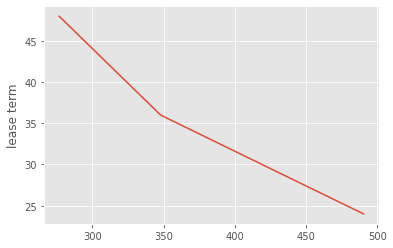

In [36]:
# let us compare monthly payments for terms for same money factor
monthly_payment =[]
lease_term = [24,36,48]
residual_percentage=.59

for x in lease_term:
    total_payment_1, monthly_payment_1 = get_payment(base_cap_cost, apr, residual_percentage, x, dealer_acquisition_cost, extended_warranties, down_payment, trade_in_allowance)
    monthly_payment.append(monthly_payment_1)

plt.plot(monthly_payment, lease_term)
plt.ylabel('lease term')
plt.show()